# Color Threshold, Blue Screen

### Why BGR instead of RGB?
OpenCV reads in images in BGR format (instead of RGB) because when OpenCV was first being developed, BGR color format was popular among camera manufacturers and image software providers. The red channel was considered one of the least important color channels, so was listed last, and many bitmaps use BGR format for image storage. However, now the standard has changed and most image software and cameras use RGB format, which is why, in these examples, it's good practice to initially convert BGR images to RGB before analyzing or manipulating them.

### Import resources

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

%matplotlib inline

### Read in and display the image

This image is: <class 'numpy.ndarray'>  with dimensions: (514, 816, 3)


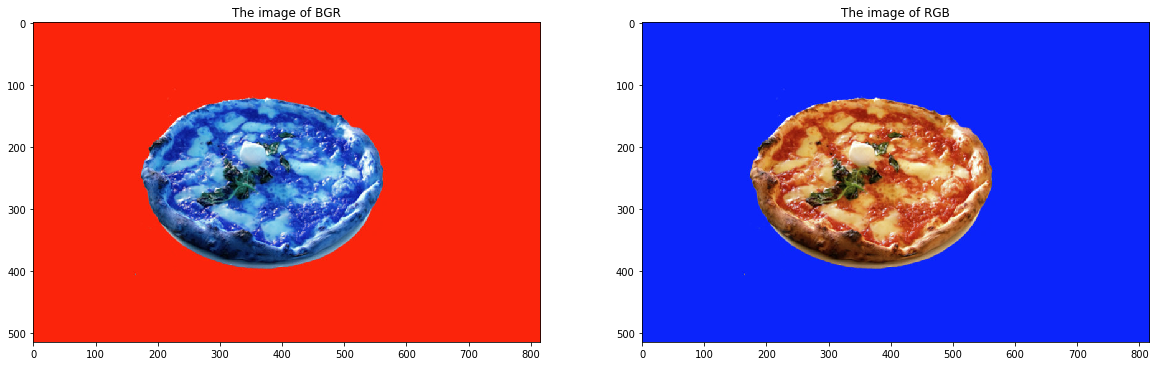

In [9]:
# Read in the image
image = cv2.imread('images/pizza_bluescreen.jpg')
image2 = mpimg.imread('images/pizza_bluescreen.jpg')

# Print out the type of image data and its dimensions (height, width, and color)
print('This image is:', type(image), 
      ' with dimensions:', image.shape)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title('The image of BGR')
ax1.imshow(image)

ax2.set_title('The image of RGB')
ax2.imshow(image2)

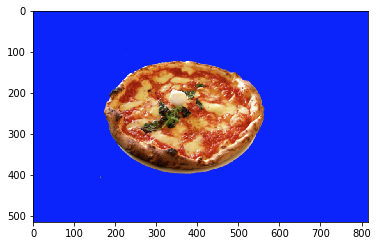

In [10]:
# Make a copy of the image
image_copy = np.copy(image)

# Change color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

# Display the image copy
plt.imshow(image_copy)


### Define the color threshold

In [70]:
## TODO: Define the color selection boundaries in RGB values
# play around with these values until you isolate the blue background
lower_blue = np.array([0,0,200]) 
upper_blue = np.array([60,80,255])


### Create a mask

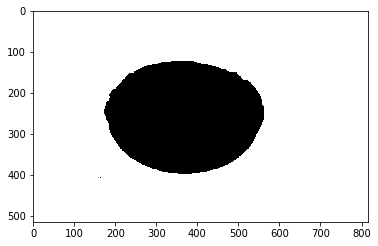

In [71]:
# Define the masked area
mask = cv2.inRange(image_copy, lower_blue, upper_blue)

# Vizualize the mask
plt.imshow(mask, cmap='gray')

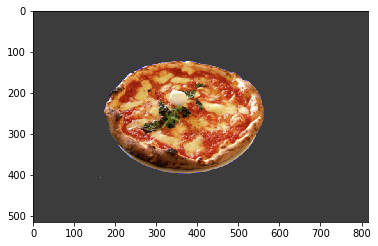

In [95]:
# Mask the image to let the pizza show through
masked_image = np.copy(image_copy)

masked_image[mask != 0] = [60, 60, 60]

# Display it!
plt.imshow(masked_image)


### Mask and add a background image

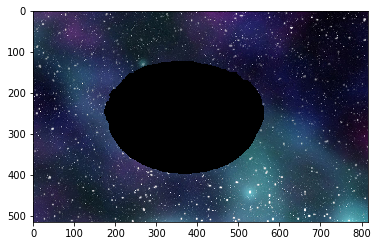

In [96]:
# Load in a background image, and convert it to RGB 
background_image = cv2.imread('images/space_background.jpg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)

# Crop it to the right size (514x816)
crop_background = background_image[0:514, 0:816]

# Mask the cropped background so that the pizza area is blocked
crop_background[mask == 0] = [0, 0, 0]

# Display the background
plt.imshow(crop_background)

### Create a complete image

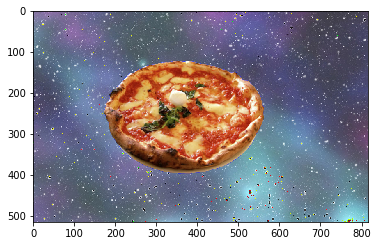

In [97]:
# Add the two images together to create a complete image!
complete_image = masked_image + crop_background

# Display the result
plt.imshow(complete_image)